<h1><center>
    ECE 438 - Laboratory 3<br/>
    Frequency Analysis<br/>
    <small>Last updated on January 23, 2022</small>
</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

write your answer here

Period $T_0=2$.

For $t\in [0,2]$:
        \begin{equation*}
            s(t)=\text{rect}(t-\frac{1}{2})
        \end{equation*}
        $w_0=\frac{2\pi}{T_0}=\pi$
        \begin{align*}
            a_0&=\frac{1}{T_0}\int_Tx(t)dt\\
            &=\frac{1}{2}\int_0^2\text{rect}(t-\frac{1}{2})dt\\
            &=\frac{1}{2}\int_0^1dt\\
            &=\frac{1}{2}
        \end{align*}
        \begin{align*}
            a_k&=\frac{1}{T_0}\int_Tx(t)e^{-jk\omega_0t}dt\\
            &=\frac{1}{2}\int_0^2\text{rect}(t-\frac{1}{2})e^{-jk\omega_0t}dt\\
            &=\frac{1}{2}\int_0^1e^{-jk\omega_0t}dt\\
            &=\frac{1}{2}\bigg[\frac{1}{-jk\omega_0}e^{-jk\omega_0t}\bigg]_0^1\\
            &=\frac{1-e^{-jk\omega_0}}{2jk\omega_0}\\
            &=\frac{1-e^{-jk\pi}}{2jk\pi}\\
            &=\frac{1-(-1)^k}{2jk\pi}\\
            &=\begin{cases}
                \frac{1}{jk\pi}&\text{$k$ is odd}\\
                0&\text{$k$ is even}
            \end{cases}
        \end{align*}
        \begin{align*}
            s(t)&=a_0+\sum_{k=1}^\infty a_ke^{jk\pi t}+a_k^*e^{-jk\pi t}\\
            &=\frac{1}{2}+\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{e^{jk\pi t}}{jk\pi}+\frac{e^{-jk\pi t}}{-jk\pi}\\
            &=\frac{1}{2}+\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{2}{k\pi}\frac{e^{jk\pi t}-e^{-jk\pi t}}{2j}\\
            &=\frac{1}{2}+\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{2}{k\pi}\sin{(k\pi t)}
        \end{align*}
---
Period $T_0=1$. 

For $t\in [-\frac{1}{2},\frac{1}{2}]$:
        \begin{equation*}
            s(t)=\text{rect}(2t)-\frac{1}{2}
        \end{equation*}
        $w_0=\frac{2\pi}{T_0}=2\pi$
        \begin{align*}
            a_0&=\frac{1}{T_0}\int_Tx(t)t\\
            &=\frac{1}{1}\bigg(\int_{-\frac{1}{4}}^\frac{1}{4}\frac{1}{2}dt+\int_{-\frac{1}{2}}^{-\frac{1}{4}}-\frac{1}{2}dt+\int_{\frac{1}{4}}^{\frac{1}{2}}-\frac{1}{2}dt\bigg)\\
            &=\frac{1}{4}-\frac{1}{8}-\frac{1}{8}\\
            &=0
        \end{align*}
        \begin{align*}
            a_k&=\frac{1}{T_0}\int_Tx(t)e^{-jk\omega_0t}dt\\
            &=\int_{-\frac{1}{2}}^{-\frac{1}{4}}-\frac{1}{2}e^{-jk2\pi t}dt+\int_{-\frac{1}{4}}^{\frac{1}{4}}\frac{1}{2}e^{-jk2\pi t}dt+\int_{\frac{1}{4}}^{\frac{1}{2}}-\frac{1}{2}e^{-jk2\pi t}dt\\
            &=\left[\frac{1}{jk4\pi}e^{-jk2\pi t}\right]_{-\frac{1}{2}}^{-\frac{1}{4}}+\left[-\frac{1}{jk4\pi}e^{-jk2\pi t}\right]_{-\frac{1}{4}}^{\frac{1}{4}}+\left[\frac{1}{jk4\pi}e^{-jk2\pi t}\right]_{\frac{1}{4}}^{\frac{1}{2}}\\
            &=\frac{e^{jk\frac{1}{2}\pi}-e^{jk\pi}}{jk4\pi}-\frac{e^{-jk\frac{1}{2}\pi}-e^{jk\frac{1}{2}\pi}}{jk4\pi}+\frac{e^{-jk\pi}-e^{-jk\frac{1}{2}\pi}}{jk4\pi}\\
            &=\begin{cases}
                \frac{j^k}{jk\pi}&\text{$k$ is odd}\\
                0&\text{$k$ is even}
            \end{cases}
        \end{align*}
        \begin{align*}
            s(t)&=a_0+\sum_{k=1}^\infty a_ke^{jk2\pi t}+a_k^*e^{-jk2\pi t}\\
            &=\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{j^k}{j\pi k}e^{jk2\pi t}-\frac{(-j)^k}{j\pi k}e^{-jk2\pi t}\\
            &=\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{j^k}{j\pi k}e^{jk2\pi t}+\frac{j^k}{j\pi k}e^{-jk2\pi t}\\
            &=\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{2j^k}{j\pi k}\frac{e^{jk2\pi t}+e^{-jk2\pi t}}{2}\\
            &=\sum_{\text{$k=1$, $k$ is odd}}^\infty \frac{2j^k}{j\pi k}\cos(k2\pi t)\\
            &=\sum_{k=1,5,9,\dots}^\infty \frac{2}{\pi k}\cos(k2\pi t)+\sum_{k=3,7,11,\dots}^\infty \frac{-2}{\pi k}\cos(k2\pi t)\\
            &=\sum_{k=1,5,9,\dots}^\infty \frac{2}{\pi k}\sin(k2\pi t+\frac{1}{2}\pi)+\sum_{k=3,7,11,\dots}^\infty \frac{-2}{\pi k}\sin(k2\pi t+\frac{1}{2}\pi)
        \end{align*}

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

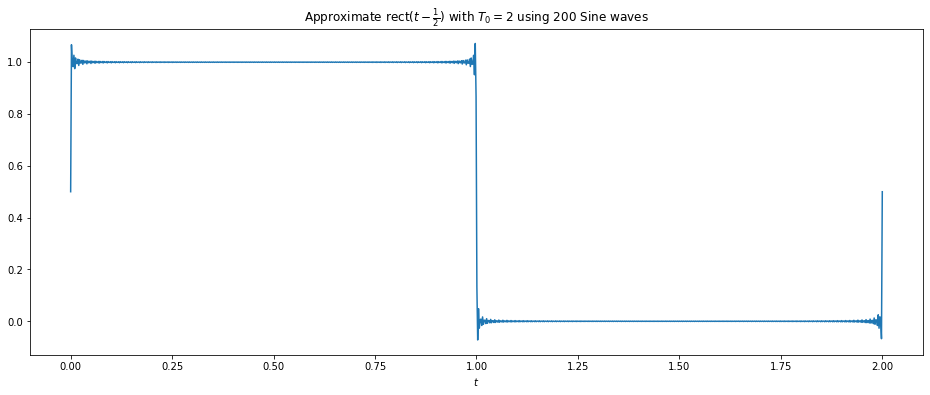

In [3]:
def func1(t, num_k):
    k = 1
    x = np.ones(len(t)) * 1 / 2  # a0
    for _ in range(num_k):
        x += 2 / (k * np.pi) * np.sin(k * np.pi * t)
        k += 2
    return x

t = np.linspace(0, 2, 1000)
x1 = func1(t, 200)
plt.plot(t, x1)
plt.title(r"Approximate rect$(t-\frac{1}{2})$ with $T_0=2$ using 200 Sine waves")
plt.xlabel(r"$t$")
plt.show()

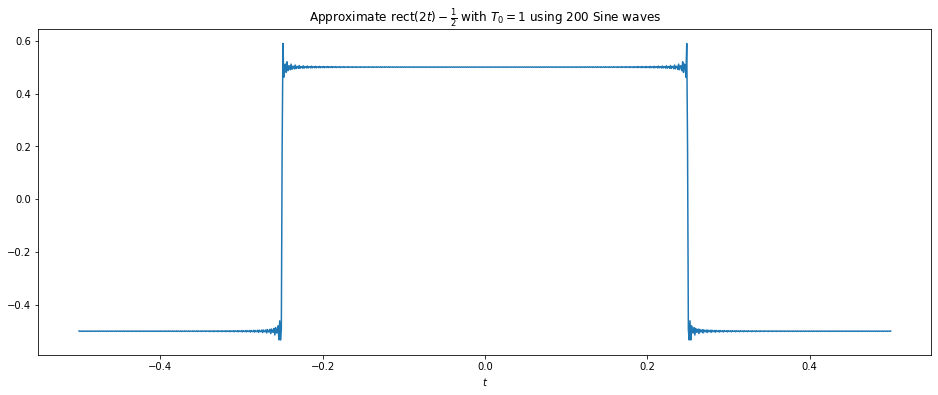

In [4]:
def func2(t, num_k):
    k = 1
    x = np.zeros(len(t))  # a0
    for _ in range(num_k):
        if k % 4 == 1:
            x += 2 / (np.pi * k) * np.sin(k * 2 * np.pi * t + 1 / 2 * np.pi)
        elif k % 4 == 3:
            x += -2 / (np.pi * k) * np.sin(k * 2 * np.pi * t + 1 / 2 * np.pi)
        k += 2
    return x

t = np.linspace(-1/2, 1/2, 1000)
x2 = func2(t, 200)
plt.plot(t, x2)
plt.title(r"Approximate rect$(2t)-\frac{1}{2}$ with $T_0=1$ using 200 Sine waves")
plt.xlabel(r"$t$")
plt.show()

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

<img src="plots/Lab3_sec_4.1_signal1.png" style="width:50%" alt>
<img src="plots/Lab3_sec_4.1_signal2.png" style="width:50%" alt>
<img src="plots/Lab3_sec_4.1_signal3.png" style="width:50%" alt>

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

insert your plots here

**2. What effect does changing the modulating frequency have on the spectral density?**

write your answer here

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

write your answer here

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

write your answer here

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

insert your printout here

**2. Hand in the plot of the impulse response obtained using a unit step.**

insert your plot here

**3. What are the advantages and disadvantages of each method?**

write your answer here

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [5]:
def DTFT(x, n0, w):
    N = len(w)
    X = np.zeros(N).astype(np.complex64)
    for n in range(len(x)):
        X += x[n] * np.exp(-1j * w * (n + n0))
    return X

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

In [6]:
N = 100
n = np.linspace(-50, 50, 101)
w = np.linspace(-np.pi, np.pi, 101)

x1 = (n == 0).astype(float)
x2 = (n - 5 == 0).astype(float)
x3 = np.power(0.5, n) * (n >= 0).astype(float)

X1 = DTFT(x1, n[0], w)
X2 = DTFT(x2, n[0], w)
X3 = DTFT(x3, n[0], w)

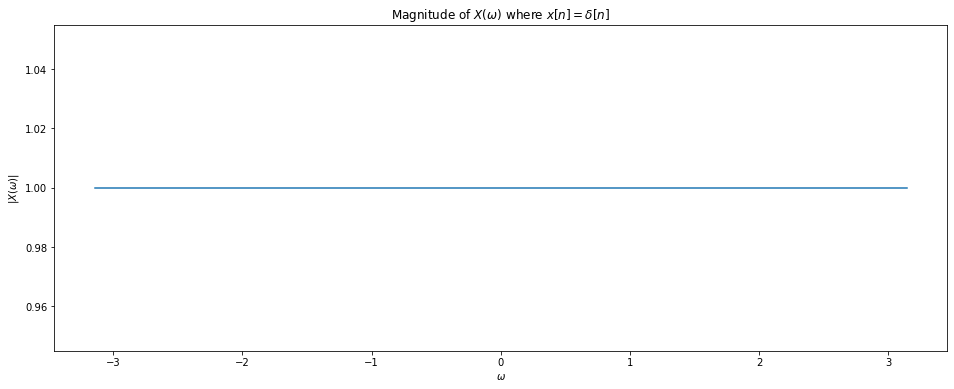

In [7]:
# first signal
plt.plot(w, np.abs(X1))
plt.title(r"Magnitude of $X(\omega)$ where $x[n]=\delta[n]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|X(\omega)|$")
plt.show()

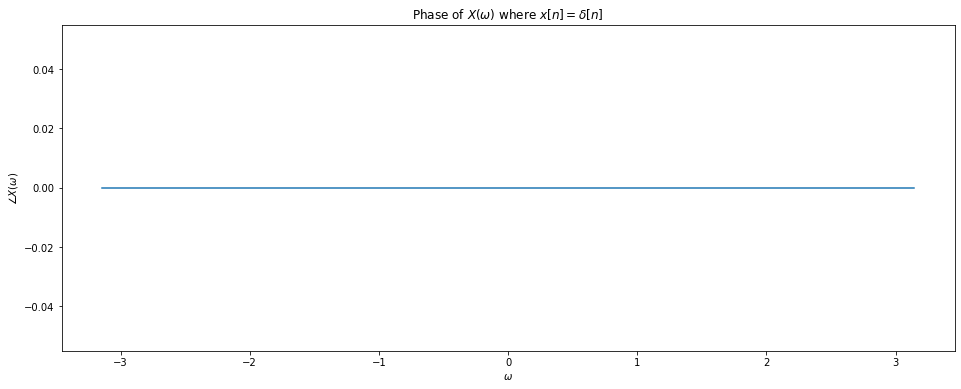

In [8]:
plt.plot(w, np.angle(X1))
plt.title(r"Phase of $X(\omega)$ where $x[n]=\delta[n]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\angle X(\omega)$")
plt.show()

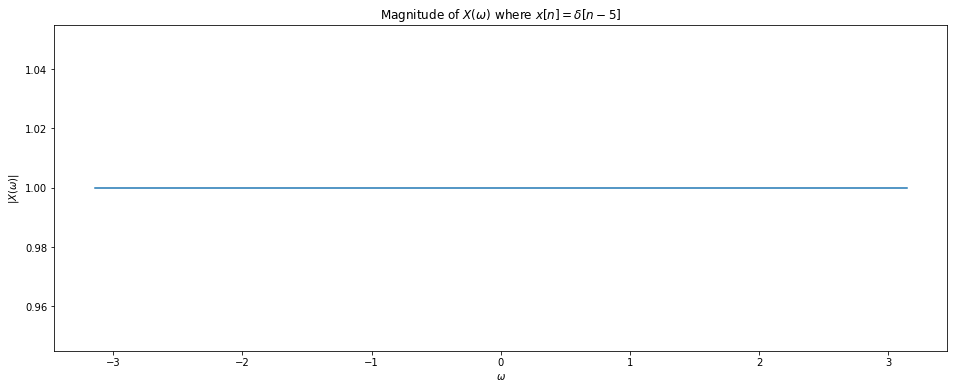

In [9]:
# second signal
plt.plot(w, np.abs(X2))
plt.title(r"Magnitude of $X(\omega)$ where $x[n]=\delta[n-5]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|X(\omega)|$")
plt.show()

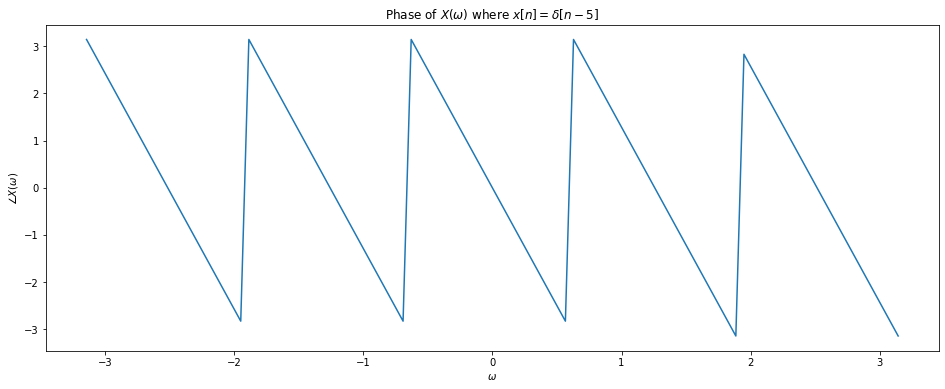

In [10]:
plt.plot(w, np.angle(X2))
plt.title(r"Phase of $X(\omega)$ where $x[n]=\delta[n-5]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\angle X(\omega)$")
plt.show()

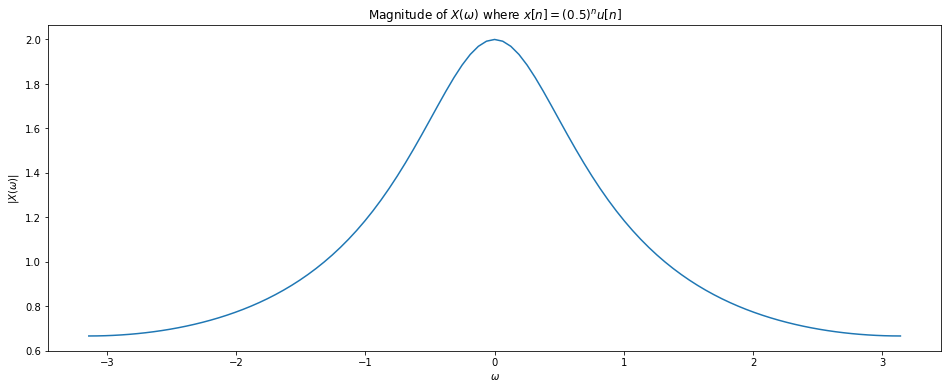

In [11]:
# third signal
plt.plot(w, np.abs(X3))
plt.title(r"Magnitude of $X(\omega)$ where $x[n]=(0.5)^nu[n]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$|X(\omega)|$")
plt.show()

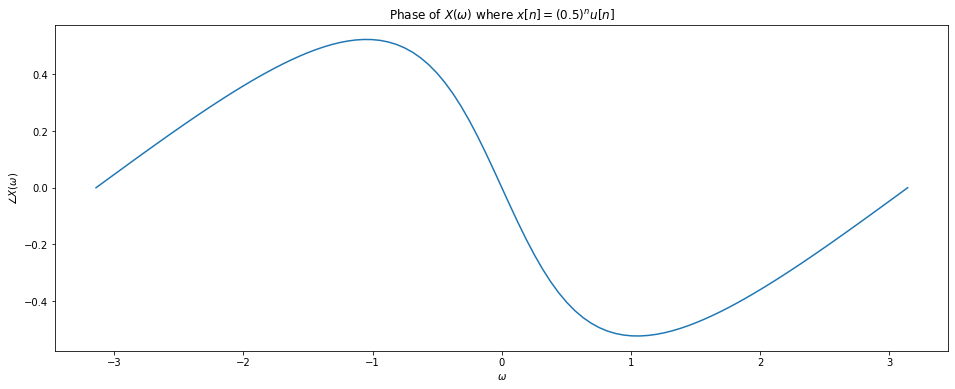

In [12]:
plt.plot(w, np.angle(X3))
plt.title(r"Phase of $X(\omega)$ where $x[n]=(0.5)^nu[n]$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\angle X(\omega)$")
plt.show()

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

<img src="plots/Lab3_sec_5.2_block.png" alt>

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

\begin{equation}
    h[n]=0.3\delta[n]+0.51\times0.9^{n-1}u[n-1]
\end{equation}

**3. Use your answer in Q2 to obtain the frequency response of the system.**

\begin{align}
    H(\omega)&=0.3+\frac{0.51e^{-j\omega}}{1-0.9e^{-j\omega}}\\
    &=\frac{0.3+0.24e^{-j\omega}}{1-0.9e^{-j\omega}}
\end{align}

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

Firstly,
\begin{align}
Y(\omega)&=0.9Y(\omega)e^{-j\omega}+0.3X(\omega)+0.24X(\omega)e^{-j\omega}\\
(1-0.9e^{-j\omega})Y(\omega)&=(0.3+0.24e^{-j\omega})X(\omega)
\end{align}
so
\begin{align}
    H(\omega)&=\frac{Y(\omega)}{X(\omega)}\\
             &=\frac{0.3+0.24e^{-j\omega}}{1-0.9e^{-j\omega}}
\end{align}

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

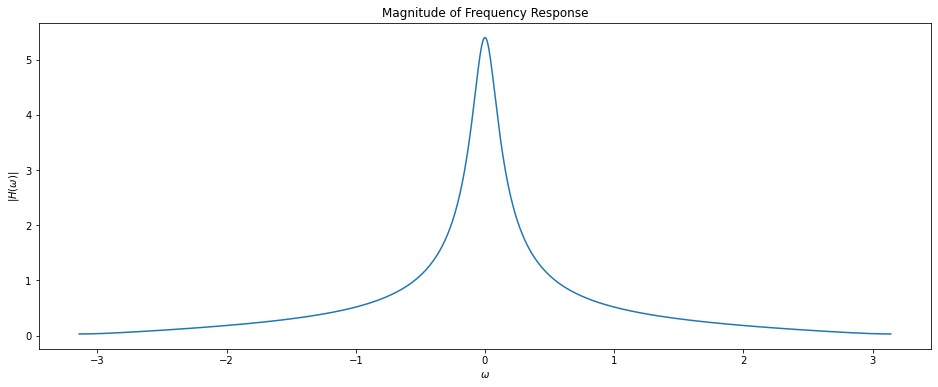

In [13]:
n = np.linspace(-500, 500, 1001)
w = np.linspace(-np.pi, np.pi, 1001)

H = (0.3+0.24*np.exp(-1j*w))/ (1-0.9*np.exp(-1j*w))

plt.plot(w, np.abs(H))
plt.title("Magnitude of Frequency Response")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.show()

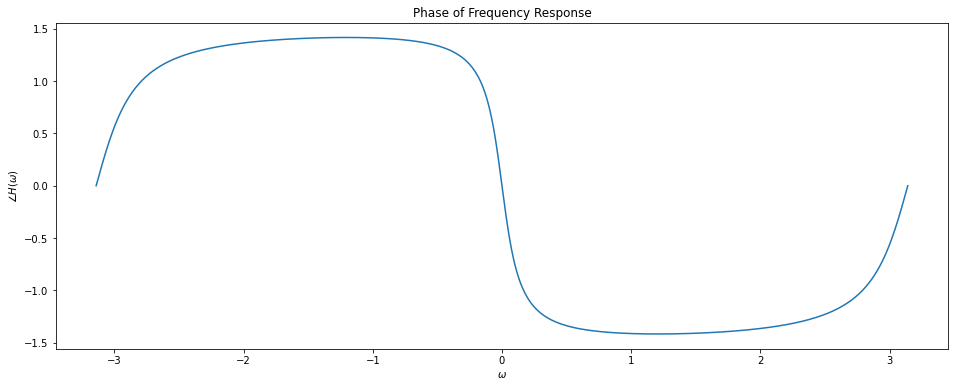

In [14]:
plt.plot(w,np.angle(H))
plt.title('Phase of Frequency Response')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\angle H(\omega)$')
plt.show()

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

<img src="plots/Lab3_sec_5.3_block.png" alt>

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |              |                    |
|  $\pi/8$ |              |                    |
|  $\pi/4$ |              |                    |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [15]:
n = np.linspace(-100, 100, 201)
w = np.linspace(-np.pi, np.pi, 201)

h = 0.3 * (n == 0).astype(float) + 0.51 * np.power(0.9, n - 1) * (n - 1 >= 0).astype(float)
H = DTFT(h, n[0], w)

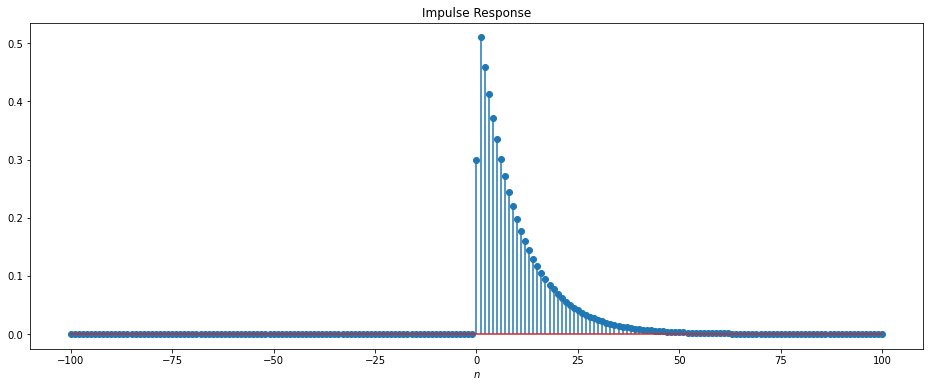

In [16]:
plt.stem(n, h)
plt.title("Impulse Response")
plt.xlabel(r"$n$")
plt.show()

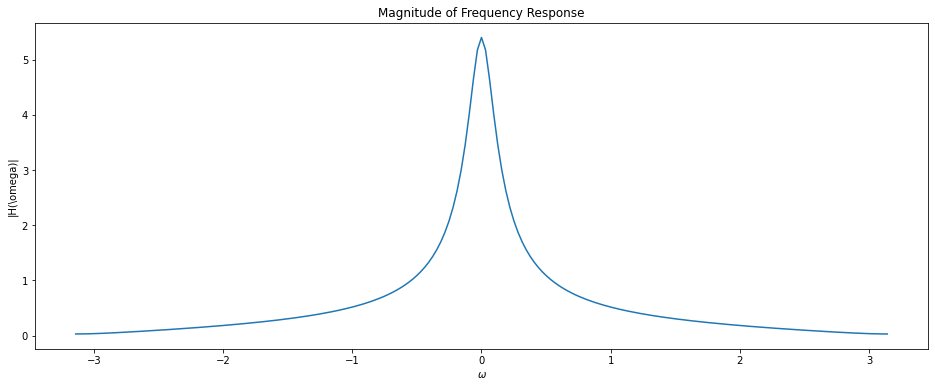

In [17]:
plt.plot(w, np.abs(H))
plt.title("Magnitude of Frequency Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"|H(\omega)|")
plt.show()

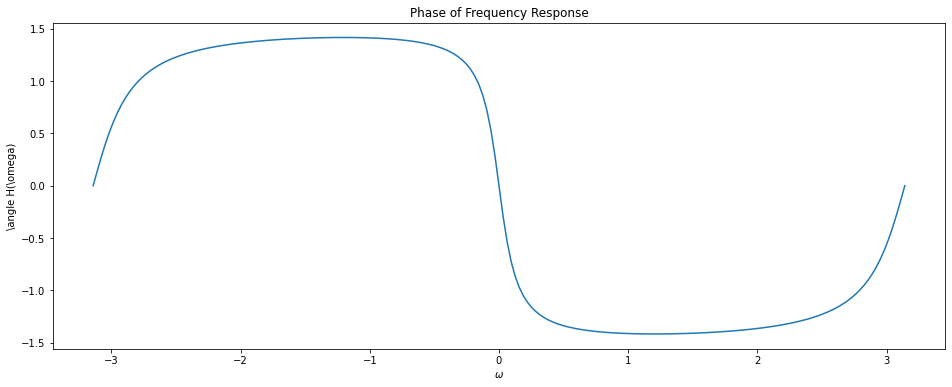

In [18]:
plt.plot(w, np.angle(H))
plt.title("Phase of Frequency Response")
plt.xlabel(r"$\omega$")
plt.ylabel(r"\angle H(\omega)")
plt.show()